# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [46]:
# Let's get started importing the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



In [47]:
# Loading the data
df = pd.read_csv('ames_train.csv')

In [48]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [85]:
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [49]:
df.head()
df.tail()
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

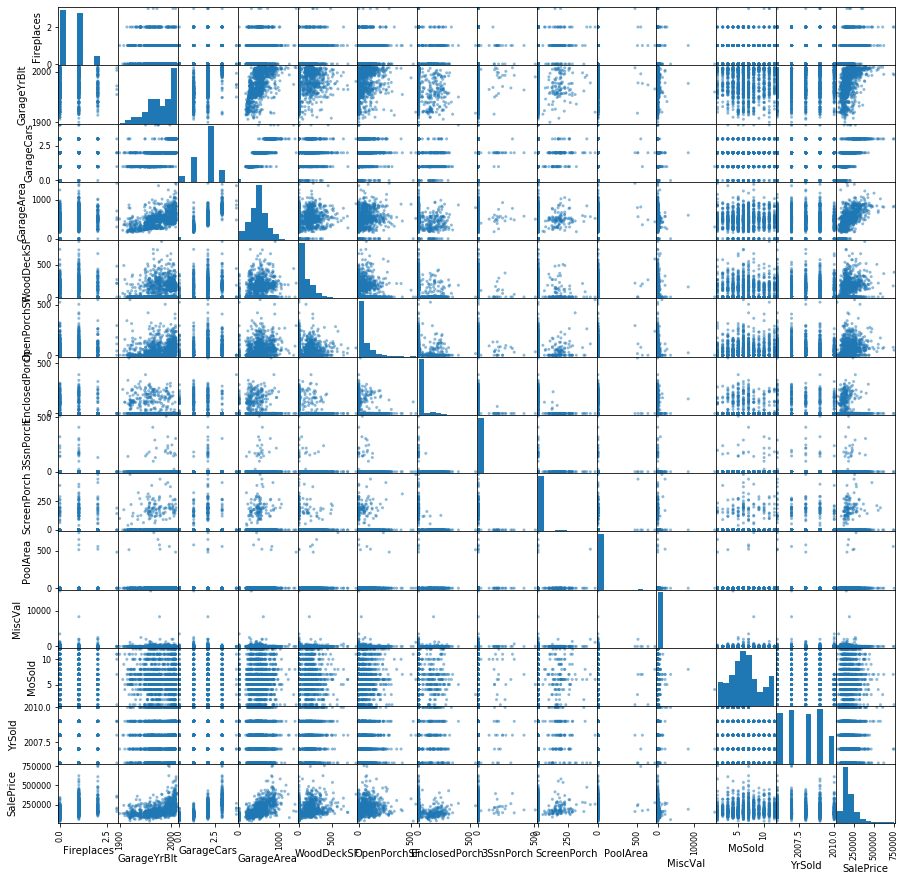

In [60]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df.loc[:,'Fireplaces':'SalePrice'], figsize=(15,15));

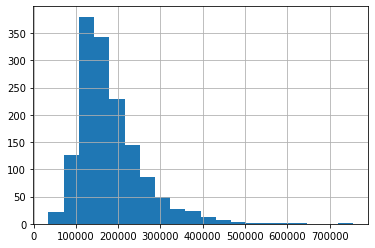

In [52]:
# Create a plot that shows the SalesPrice Distribution
df['SalePrice'].hist(bins=20)


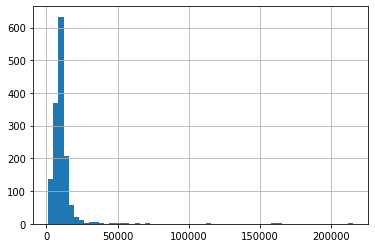

In [56]:
# Create a plot that shows the LotArea Distribution
df['LotArea'].hist(bins=60)

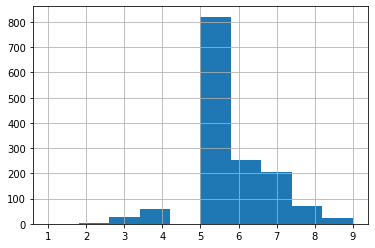

In [58]:
# Create a plot that shows the Distribution of the overall house condition
df['OverallCond'].hist()

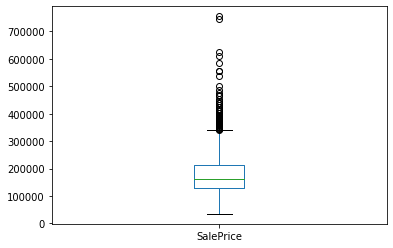

In [62]:
# Create a Box Plot for SalePrice
df['SalePrice'].plot.box()

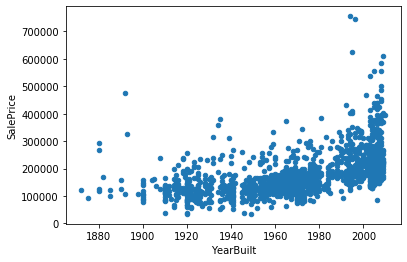

In [64]:
# Perform an Exploration of home values by age
df.plot('YearBuilt','SalePrice',kind='scatter')

In [128]:
saletypes_less_than_250k = df.loc[df['SalePrice'] < 250000, ['SaleType']]
saletypes_less_than_250k['SaleType'].value_counts(normalize=True)
#Determine the types of sells of properties for properties less than $250k
#The sell price of the property could be determined by how a buyer pays for the property

WD       0.895547
New      0.051012
COD      0.033198
ConLD    0.007287
ConLw    0.004049
ConLI    0.003239
CWD      0.002429
Oth      0.002429
Con      0.000810
Name: SaleType, dtype: float64

In [129]:
saletypes_over250k = df.loc[df['SalePrice'] > 250000, ['SaleType']]
saletypes_over250k['SaleType'].value_counts(normalize=True)

WD       0.705069
New      0.271889
COD      0.009217
ConLI    0.004608
CWD      0.004608
Con      0.004608
Name: SaleType, dtype: float64

In [ ]:
#newly constructed homes make up a larger percentage of sale types for properties over $250,000
#however there is a much smaller sample size for homes over 250,000

In [135]:
lot_size_after09 = df.loc[df['YrSold'] >= 2009, ['LotArea']]
lot_size_after09.head(15)


,LotArea
5,14115
7,10382
16,11241
19,7560
24,8246
25,14230
26,7200
27,11478
33,10552
36,10859


In [136]:
lot_size_after09.describe()
#How big were the lot sizes for properties sold after 2009? Did the housing crisis or urban sprawl...
# influence the size of properties going forward?
#There is a disproportionate amount of houses built after 09 because the data set only extends from 2006 to 2010.

,LotArea
count,513.000000
mean,10269.140351
std,10459.733470
min,1300.000000
25%,7500.000000
50%,9375.000000
75%,11475.000000
max,215245.000000


In [126]:
remodels = df.loc[df['YearRemodAdd'] != df['YearBuilt']]
same_old_house = df.loc[df['YearRemodAdd'] == df['YearBuilt']]
remodels.head()
remodels.shape
remodels['SalePrice'].mean()
#average sale price of a home that has been remodeled
same_old_house['SalePrice'].mean() > remodels['SalePrice'].mean() 
#average sale price of non-renovated house is greater than average sale price of remolded homes (did not expect this)

True

In [130]:
remodels.shape

(696, 81)

In [131]:
same_old_house.shape

(764, 81)

In [132]:
remodels['SalePrice'].describe()

count       696.000000
mean     179096.307471
std       88383.080722
min       34900.000000
25%      121900.000000
50%      155000.000000
75%      213062.500000
max      755000.000000
Name: SalePrice, dtype: float64

In [133]:
same_old_house['SalePrice'].describe()

count       764.000000
mean     182583.659686
std       70333.800127
min       55993.000000
25%      135500.000000
50%      170000.000000
75%      214000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [ ]:
#Sample sizes for non-remodels and remodels is the same.  It makes sense that remodels have a higher standard deviation
# since we are unable to associate a value to the remodels that were done.  

Text(0, 0.5, 'Living Area in SF')

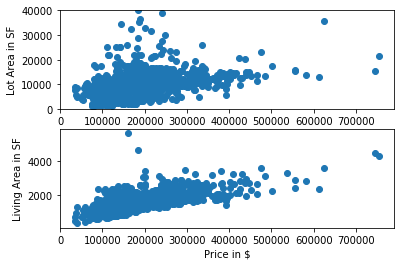

In [146]:
fig, axs = plt.subplots(2)
axs[0].scatter(df['SalePrice'], df['LotArea'])
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Lot Area in SF')
axs[0].set_ylim([0,40000])
axs[1].scatter(df['SalePrice'], df['GrLivArea'] )
axs[1].set_xlabel('Price in $')
axs[1].set_ylabel('Living Area in SF')

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

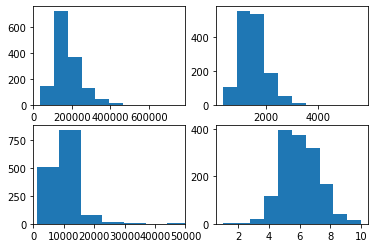

In [151]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(df['SalePrice'])
axs[0,1].hist(df['GrLivArea'])
axs[1,0].hist(df['LotArea'], bins=30)
axs[1,0].set_xlim([0,50000])
axs[1,1].hist(df['OverallQual'])

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!